In [15]:
#a. Load the dataset
import tensorflow as tf  
from keras.preprocessing.image import ImageDataGenerator  
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10 as cf10

In [16]:
tf.__version__ 

'2.15.0'

In [17]:
# Load the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cf10.load_data()

# Exploratory Data Analysis

In [18]:
# 1. Function for showing images
def show_images(train_images, class_names, train_labels, nb_samples = 12, nb_row = 4):
    plt.figure(figsize=(6,6))
    for i in range(nb_samples):
        plt.subplot(nb_row, nb_row, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(train_images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[train_labels[i][0]])
    plt.show()

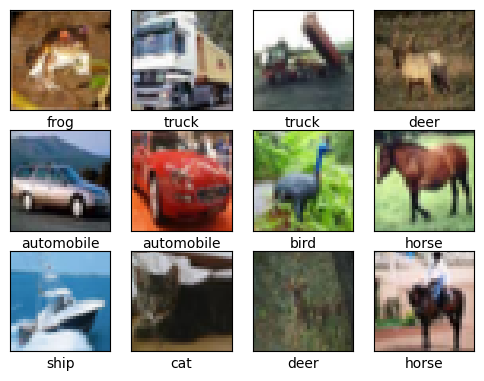

In [19]:
# Visualize some sample images from the dataset
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']
show_images(train_images, class_names, train_labels)

In [20]:
from tensorflow.keras.utils import to_categorical
 # Data normalization
max_pixel_value = 255
 
train_images = train_images / max_pixel_value
test_images = test_images / max_pixel_value
 
# One-hot encode the labels
train_labels = to_categorical(train_labels, len(class_names))
test_labels = to_categorical(test_labels, len(class_names))

# Model architecture

In [21]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
 # Variables
INPUT_SHAPE = (32, 32, 3)
FILTER1_SIZE = 32
FILTER2_SIZE = 64
FILTER_SHAPE = (3, 3)
POOL_SHAPE = (2, 2)
FULLY_CONNECT_NUM = 128
NUM_CLASSES = len(class_names)
 
# Model architecture implementation
model = Sequential()
model.add(Conv2D(FILTER1_SIZE, FILTER_SHAPE, activation='relu', input_shape=INPUT_SHAPE))
model.add(MaxPooling2D(POOL_SHAPE))
model.add(Conv2D(FILTER2_SIZE, FILTER_SHAPE, activation='relu'))
model.add(MaxPooling2D(POOL_SHAPE))
model.add(Flatten())
model.add(Dense(FULLY_CONNECT_NUM, activation='relu'))
model.add(Dense(NUM_CLASSES, activation='softmax'))

# Model training

In [22]:

from tensorflow.keras.metrics import Precision, Recall
 
BATCH_SIZE = 32
EPOCHS = 15
 
METRICS = metrics=['accuracy', 
                   Precision(name='precision'),
                   Recall(name='recall')]
 
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics = METRICS)
 
# Train the model
training_history = model.fit(train_images, train_labels, 
                    epochs=EPOCHS, batch_size=BATCH_SIZE,
                    validation_data=(test_images, test_labels))


Epoch 1/15


1563/1563 [==============================] - 67s 39ms/step - loss: 1.3964 - accuracy: 0.4988 - precision: 0.7174 - recall: 0.2848 - val_loss: 1.0933 - val_accuracy: 0.6146 - val_precision: 0.7500 - val_recall: 0.4602
Epoch 2/15
1563/1563 [==============================] - 67s 43ms/step - loss: 1.0332 - accuracy: 0.6377 - precision: 0.7729 - recall: 0.5029 - val_loss: 0.9785 - val_accuracy: 0.6670 - val_precision: 0.7951 - val_recall: 0.5183
Epoch 3/15
1563/1563 [==============================] - 71s 45ms/step - loss: 0.8933 - accuracy: 0.6881 - precision: 0.7972 - recall: 0.5784 - val_loss: 0.9499 - val_accuracy: 0.6735 - val_precision: 0.7586 - val_recall: 0.5824
Epoch 4/15
1563/1563 [==============================] - 72s 46ms/step - loss: 0.7851 - accuracy: 0.7273 - precision: 0.8197 - recall: 0.6378 - val_loss: 0.8864 - val_accuracy: 0.7006 - val_precision: 0.7895 - val_recall: 0.6066
Epoch 5/15
1563/1563 [==============================] - 69s 44ms/step - loss: 0.6889 -

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 2304)              0         
                                                                 
 dense_2 (Dense)             (None, 128)              

# Evaluate the model.

313/313 [==============================] - 5s 15ms/step
[[731  17  47  17  35   7  11  15  88  32]
 [ 18 831   8  12   5   1  13   4  25  83]
 [ 50  13 592  87  74  33  79  46  15  11]
 [ 21  17  66 525 101  97  85  48  18  22]
 [ 21   5 100  64 625  20  71  79   8   7]
 [  8   7  75 231  60 483  43  72   9  12]
 [  6   9  42  53  32  19 815  10  10   4]
 [ 17   5  35  46  77  38  13 743   9  17]
 [ 53  47  15  11  15   4   9   7 812  27]
 [ 33 105   9  19   9   7   9  21  33 755]]


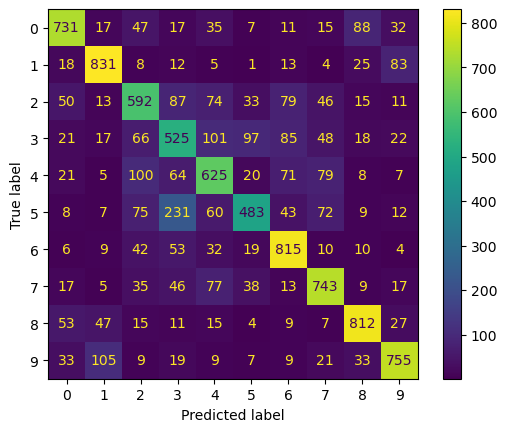

In [24]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
 
# Obtain the model's predictions on the test dataset
test_predictions = model.predict(test_images)
 
# Convert predictions from probabilities to class labels
test_predicted_labels = np.argmax(test_predictions, axis=1)
 
# Convert one-hot encoded true labels back to class labels
test_true_labels = np.argmax(test_labels, axis=1)
 
# Compute the confusion matrix
cm = confusion_matrix(test_true_labels, test_predicted_labels)
print(cm) 
# Create a ConfusionMatrixDisplay instance
cmd = ConfusionMatrixDisplay(confusion_matrix=cm)
 
# Plot the confusion matrix
cmd.plot(include_values=True, cmap='viridis', ax=None, xticks_rotation='horizontal')
plt.show()